In [11]:
%matplotlib inline
from matplotlib import pyplot
import geopandas
%run -i weave_map.py

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

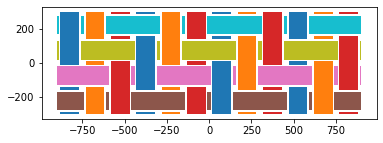

In [12]:
w1 = get_weave_unit(weave_type = "twill", spacing = 150, aspect = 0.8, margin = 5, strands = "abc|defg", crs = 2193)
# ax = w.weave_unit.plot(column = "strand", edgecolor = "w")
# w.tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "r")

w1.weave_unit.plot(column = "strand")

<AxesSubplot:>

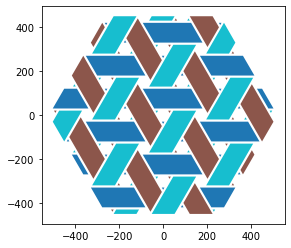

In [13]:
w2 = get_weave_unit(weave_type = "cube", spacing = 150, aspect = 2/3, margin = 5, strands = "a|b|c", crs = 2193)
# ax = w.weave_unit.plot(column = "strand", edgecolor = "w")
# w.tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "r")

w2.weave_unit.plot(column = "strand")

In [14]:
ak = geopandas.read_file("data/imd-auckland-2018.gpkg")
# ak.plot()

### Tiling

In [15]:
weave2 = get_tiling(w2, ak, 20)
textile2 = ak.overlay(weave2)

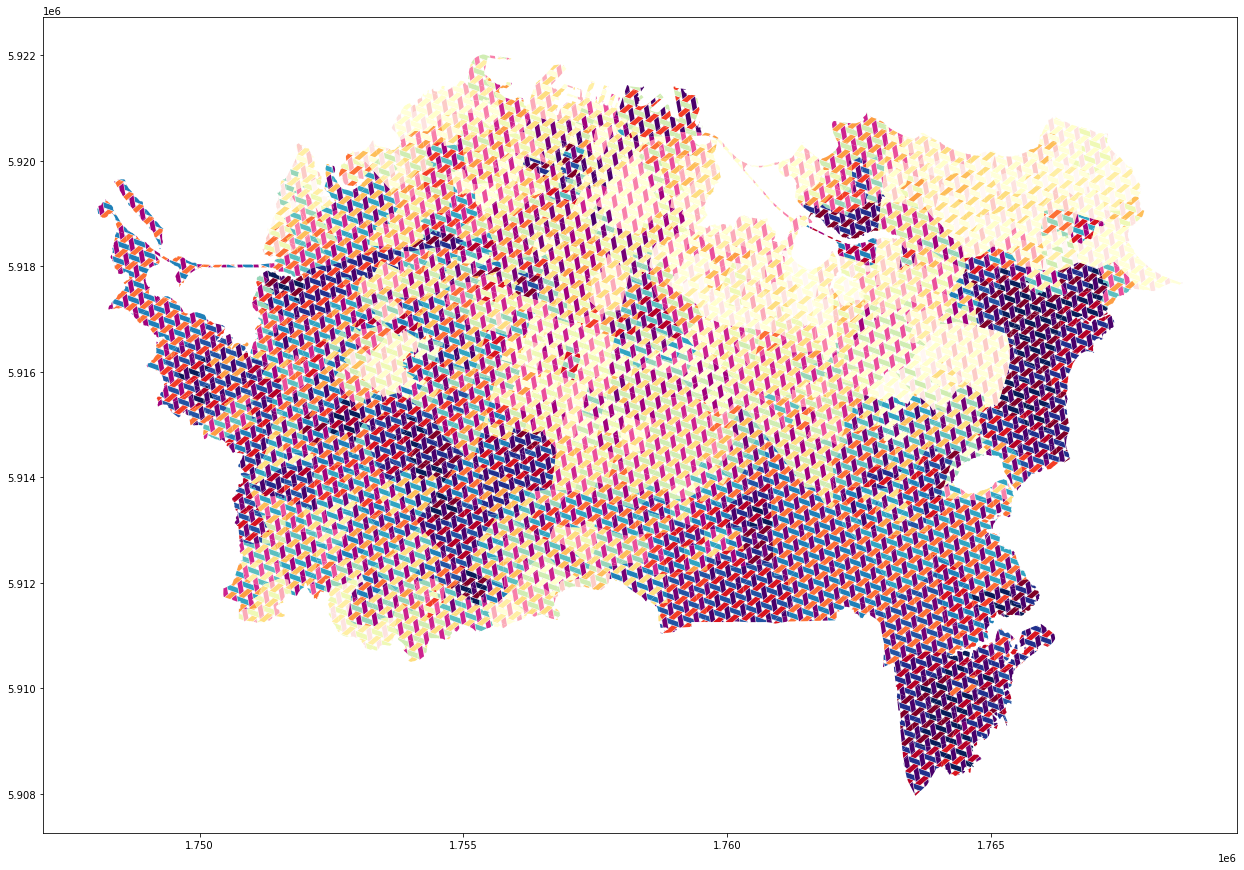

In [16]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(textile2.strand)
cols = ("Decile_Emp", "Decile_Inc", "Decile_Hou")
cmaps = ("YlOrRd", "YlGnBu", "RdPu")

for strand, col, cmap in zip(strands, cols, cmaps):
    textile2[textile2.strand == strand].plot(ax = ax, column = col, cmap = cmap, k = 9)


In [17]:
weave1 = get_tiling(w1, ak, 30)
textile1 = ak.overlay(weave1)

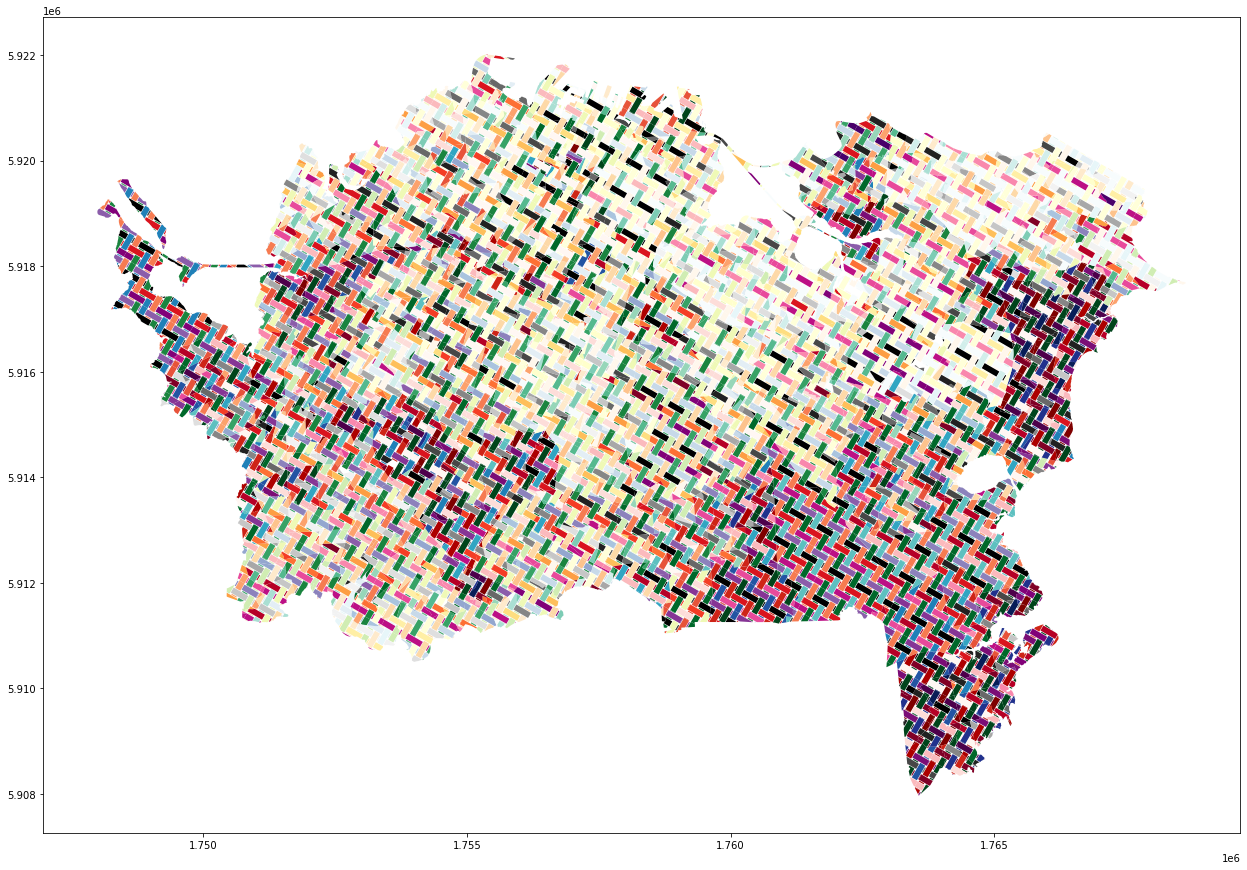

In [18]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

strands = set(textile1.strand)
cols = [x for x in textile1.columns if "Decile" in x]
cmaps = ("OrRd", "BuPu", "Greys", "BuGn", "YlOrRd", "YlGnBu", "RdPu")

for strand, col, cmap in zip(strands, cols, cmaps):
    textile1[textile1.strand == strand].plot(ax = ax, column = col, cmap = cmap)
